<img src="./unal.png" align=left width="150" height="150"></img>



$\,$
---

<h2 align="center">DIAGNÓSTICO DEL CÁNCER DE MAMA EN EL ESTADO DE WISCONSIN</h2>
<h3 align="center">ANÁLISIS MULTIVARIADO (Inferencia en el vector de medias y matriz de varianzas) </h3>

$\;$

### Inferencias sobre el vector de medias

Según las gráficas de las distribuciones marginales de las variables (Compacticidad, simetría y Suavidad) se reflejaba la no normalidad junto con los qqplot y verificando este supuesto bajo las pruebas de Shapiro-Wilk se afirmaba la no normalidad, este es un supuesto indispensable en la teoría clásica puesto que su uso sin este supuesto conllevaría inferencias no válidas, una forma de solucionar este problema es considerando transformaciones de los datos para de esta manera realizar análisis de la teoría normal. Según Johnson y Wichern (2002) las transformaciones no son más que una reexpresión de los datos en diferentes unidades.


En muchos casos, la elección de una transformación para mejorar la aproximación a  la normalidad no es obvio, no existe una única transformación a los datos algunas son mejores que otras, uno de las transformaciones es comunmente usadas es la de Box-Cox la cual tiene como objetivo homogeneizar la varianza, sin embargo en la mayoría de casos al usarse se logra corregir conjuntamente el problema de la no normalidad. (Melo et al., 2018. p256).

Una de las transformaciones usadas es la de la familia Johnson la cual transforma en normalidad usando la familia Z de distribuciones. la transformación de Johnson es basada en el método de los percentiles devolviendo la variable transformada, para tal fin se usa la función **RE.Johnson** de la libreria Johnson. 

In [1]:
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\analisis multivariado\\TALLER1FINAL")
databiopsia<-read.csv("data.csv",sep = ",")

#organizando los datos 
A<-databiopsia[,c("diagnosis","compactness_mean","smoothness_mean","symmetry_mean","area_mean")]
databiopsia <- data.frame(A)
colnames(databiopsia)<-c("diagnosis", "compactness", "smoothness","symmetry", "area")
head(databiopsia, n=10)

diagnosis,compactness,smoothness,symmetry,area
M,0.27760,0.11840,0.2419,1001.0
M,0.07864,0.08474,0.1812,1326.0
M,0.15990,0.10960,0.2069,1203.0
M,0.28390,0.14250,0.2597,386.1
M,0.13280,0.10030,0.1809,1297.0
M,0.17000,0.12780,0.2087,477.1
M,0.10900,0.09463,0.1794,1040.0
M,0.16450,0.11890,0.2196,577.9
M,0.19320,0.12730,0.2350,519.8
M,0.23960,0.11860,0.2030,475.9


### Transformando los datos

In [6]:
library("Johnson")

str(databiopsia)
x2<-RE.Johnson(databiopsia[,2])
x3<-RE.Johnson(databiopsia[,3])
x4<-RE.Johnson(databiopsia[,4])
x5<-RE.Johnson(databiopsia[,5])
databiopsianormada<-data.frame(databiopsia$diagnosis,x2$transformed,x3$transformed,x4$transformed,x5$transformed)
colnames(databiopsianormada)<-c("diagnosis", "compactness", "smoothness","symmetry", "area")
#xtable(head(databiopsianormada))

'data.frame':	569 obs. of  5 variables:
 $ diagnosis  : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ compactness: num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ smoothness : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ symmetry   : num  0.242 0.181 0.207 0.26 0.181 ...
 $ area       : num  1001 1326 1203 386 1297 ...


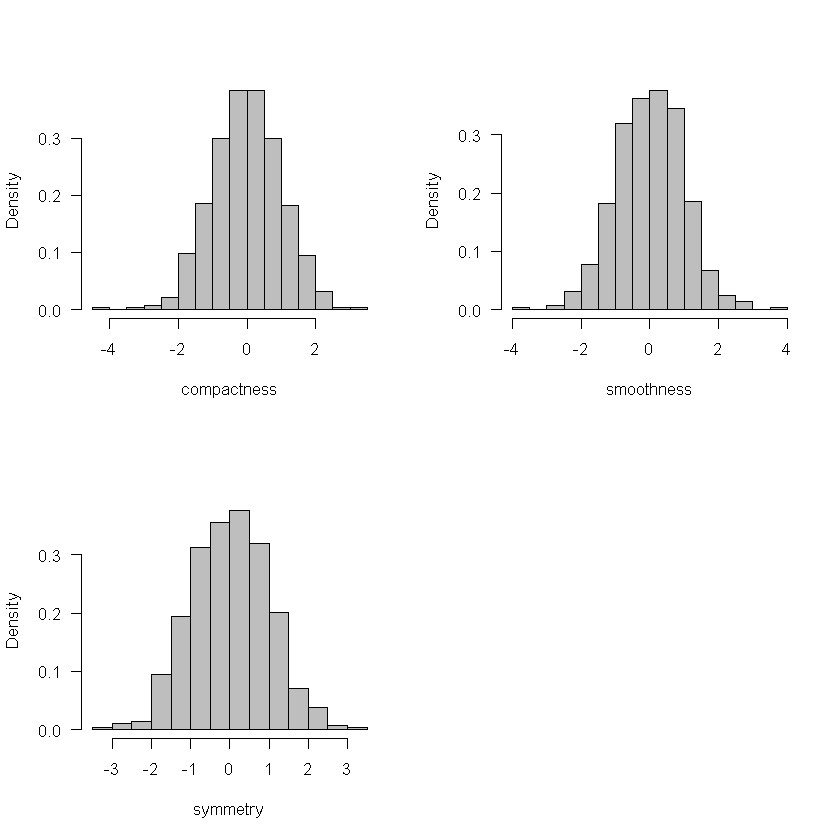

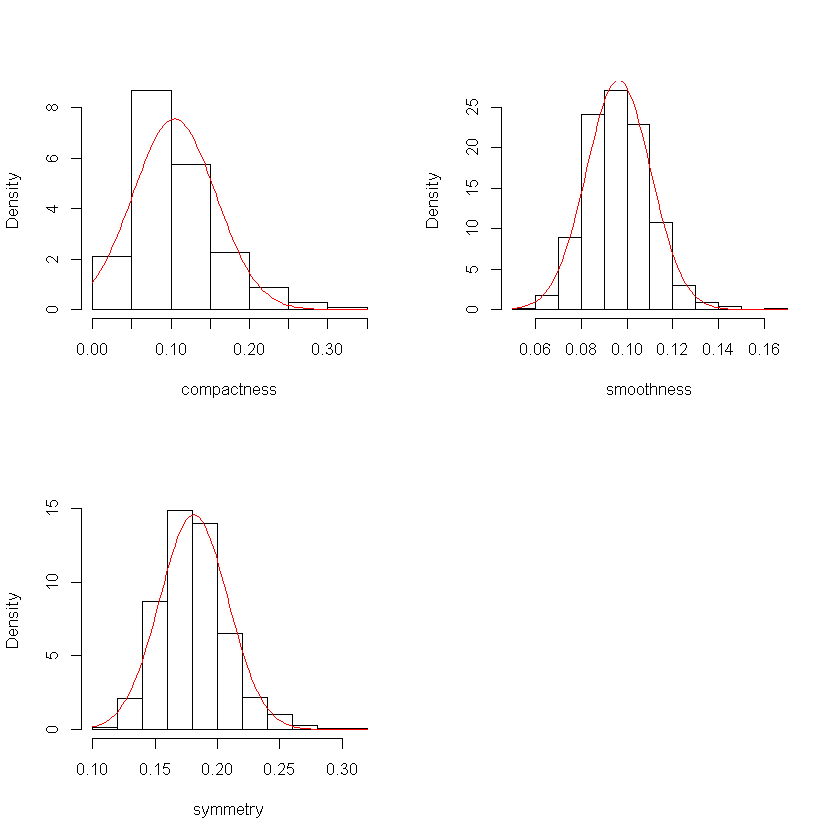

In [19]:
par(mfrow=c(2,2))

hist(x2$transformed,main="",xlab="compactness",border="black",col="gray",las=1,prob = TRUE)
#lines(density(x2$transformed),pch = 20)


hist(x3$transformed,main="",xlab="smoothness",border="black",col="gray",las=1,prob = TRUE)
#lines(density(x3$transformed))


hist(x4$transformed,main="",xlab="symmetry",border="black",col="gray",las=1,prob = TRUE)
#lines(density(x4$transformed))


#hist(x4$transformed,main="",xlab="area",border="black",col="gray",las=1,prob = TRUE)
#lines(density(x4$transformed))

Result<- mvn(data=databiopsia[,2:4], mvnTest="royston", univariatePlot="histogram")

Para determinar si en realidad no son normales se procede a realizar los respectivos QQplot lo cuales se presentan en las siguientes figuras, donde se puede identificar que para todas las variables los datos se encuentran alrededor de la línea recta, lo cual da indicios del cumplimiento del supuesto de normalidad.

[1] 179 193

[1] 505 569

[1] 562  26

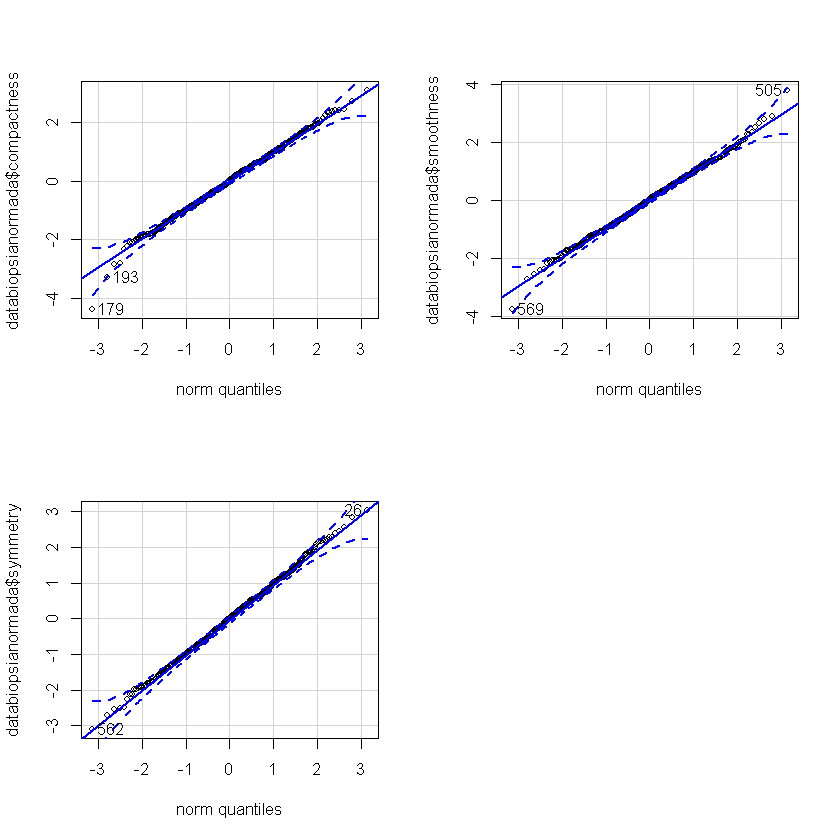

In [15]:
library("car")
par(mfrow=c(2,2))
qqPlot(databiopsianormada$compactness)
qqPlot(databiopsianormada$smoothness)
qqPlot(databiopsianormada$symmetry)
#qqPlot(databiopsianormada$symmetry)

Para confirmar este hecho se realizan las pruebas de Shapiro-Wilk (Ver Tabla \ref{Shapiro2}) para contrastar la hipótesis:

$$H_{0}: F_n(w)= N(\mu_0, \sigma_0^2) \hspace{0.9cm} vs \hspace{0.9cm} H_{1}: F_n(w) \neq N(\mu_0, \sigma_0^2) $$

No hay evidencia estadistica para rechazar $H_0$ por lo cual se afirma el hecho de que las distribuciones son normales. 

In [16]:
shapiro.test(x2$transformed)
shapiro.test(x3$transformed)
shapiro.test(x4$transformed)


	Shapiro-Wilk normality test

data:  x2$transformed
W = 0.99604, p-value = 0.164



	Shapiro-Wilk normality test

data:  x3$transformed
W = 0.99742, p-value = 0.5249



	Shapiro-Wilk normality test

data:  x4$transformed
W = 0.99877, p-value = 0.9675


Conociendo que la normalidad marginal no implica la normalidad multivariada, se genera una prueba ara identificar si las observaciones provienen de una distribucion multivarida. Para probar este hecho tomamos el test de Doornik -
Hansen, Royston para probar la hipotesis:

* $H_{0}:$ Las observaciones provienen de una distribución normal multivariada

vs

* $H_{1}:$  Las observaciones NO provienen de una distribución normal multivariada


In [35]:
# test de normalidad
# test de Mardia en MVN
library("MVN")
#result <- mvn(data = databiopsianormada[,2:4], mvnTest = "mardia")
#result$multivariateNormality

In [38]:
result <- mvn(data = databiopsianormada[,2:4], mvnTest = "royston", univariateTest = "CVM", desc = TRUE)
result

$multivariateNormality
     Test        H   p value MVN
1 Royston 4.825176 0.1826013 YES

$univariateNormality
              Test    Variable Statistic   p value Normality
1 Cramer-von Mises compactness    0.0443    0.6025    YES   
2 Cramer-von Mises smoothness     0.0367    0.7422    YES   
3 Cramer-von Mises  symmetry      0.0331    0.8014    YES   

$Descriptives
              n         Mean   Std.Dev        Median       Min      Max
compactness 569 -0.003673381 1.0031071 -0.0004093934 -4.390455 3.106183
smoothness  569  0.015940710 0.9817068  0.0391801831 -3.759306 3.808463
symmetry    569 -0.004102453 0.9866352  0.0231579142 -3.107005 3.039816
                  25th      75th        Skew    Kurtosis
compactness -0.6767993 0.6510609 -0.11297377  0.41421406
smoothness  -0.6596490 0.6793851  0.03091836  0.32663065
symmetry    -0.7030849 0.6284246  0.03755777 -0.04953545

luego obserevando la tabla anterior para un nivel de significancia de $\alpha$ = 5\% se rechaza $H_0$ para la prueba Royston, y no se rechaza $H_0$ para la prueba Royston, esto no certifica que se rechace $H_0$, sin embargo se considerará que provienen de una distribución 3-variada para hacer inferencias considerando que el número de observaciones es grande. 

No obstante, al considerar la normalidad de las observaciones, se tiene que: 
dados ${\bf x_1,x_2,x_3, ... x_n }$ cada una con ${\bf c/X_i \sim N_p(\pmb{\mu}, \Sigma )}$, considerando la siguiente hipótesis entre el vector de medias:


$$H_{0}:\pmb{\mu}= \pmb{\mu_0} \hspace{0.9cm} vs \hspace{0.9cm} H_{1}: \pmb{\mu} \neq \pmb{\mu_0}$$

Se tiene la siguiente estadística de prueba:

$$     T^2 = {(\pmb{\overline{x}-\mu_0})}' \Sigma ^{-1} 
(\pmb{\overline{x}-\mu_0})     $$

Sin embargo, considerando que disponemos de la matriz de varianzas y covarianzas muestral, se tiene:

$$     T^2 = {(\pmb{\overline{x}-\mu_0})}' \left ( \frac{\pmb{S}}{n} \right )^{-1} (\pmb{\overline{x}-\mu_0})  $$

$$     T^2 = {\sqrt{n}(\pmb{\overline{x}-\mu_0})}' \pmb{S}^{-1} (\pmb{\overline{x}-\mu_0} )\sqrt{n}  \hspace{0.5cm}  \sim  \hspace{0.5cm} T^2_{p,n-1}   $$

Donde 
$$T^2_{p,n-1} = \frac{(n-1)p}{n-p}F_{p,n-p}$$

Considerando lo anterior y conociendo que el conjunto de observaciones es grande puesto que n=569, se establece inferencias con respecto al vector de medias considerando el teorema del límite central (TCL):\\

Sean ${\bf x_1,x_2,x_3, ... x_n }$ vectores aleatorios (una m.a) independiente igualmente distribuida:  $\pmb{\overline{X}}\sim N_p(\pmb{\mu}, \pmb{\Sigma}/n )$ considerando la siguiente hipótesis entre el vector de medias:

 $$H_{0}:\pmb{\mu}= \pmb{\mu_0} \hspace{0.9cm} vs \hspace{0.9cm} H_{1}: \pmb{\mu} \neq \pmb{\mu_0}$$
 
 $$     T^2 = {n(\pmb{\overline{x}-\mu_0})}' \pmb{S}^{-1} (\pmb{\overline{x}-\mu_0} )\leqslant c^2  \hspace{0.9cm};\hspace{0.9cm}     c^2|_{H_0} \hspace{0.2cm}   \sim  \hspace{0.2cm} \chi^2_{p}   $$

### Intervalos de confianza

Considerando que ${\bf x_1,x_2,x_3, ... x_n }$  son observaciones de una distribución 3-variada con vector de medias $\pmb{ \overline{x}}$ y matriz de covarianza definida positiva $\Sigma$, se tiene:

$$\pmb{a}'\pmb{\overline{x}} \pm \sqrt{\chi^2_{p}}\sqrt{\frac{\pmb{a}'S \pmb{a}}{n}} $$

Por consiguiente intervalos de confianza simultaneos están determinados por:


$$\pmb{ \overline{x}}'=\begin{bmatrix}
\overline{x}_1\;\;,& \overline{x}_2 \;\;,& \overline{x}_3
\end{bmatrix}\;\;\;=\begin{bmatrix}
0.10434 \;\;,& 0.09636 \;\;,& 0.18116
\end{bmatrix}
$$

$$
\pmb{S}=\begin{bmatrix}
0.002784 & 0.000488 & 0.000870\\ 
0.000488 & 0.000197 & 0.000214 \\ 
0.000870 & 0.000214 & 0.000750
\end{bmatrix} \;\;\;\;\; {\bf R}=\begin{bmatrix}
1 & 0.659 & 0.602 \\ 
0.659 & 1 & 0.577 \\ 
0.602 & 0.577 & 1
\end{bmatrix}
$$


Intervalos de confianza del 95\% de confianza están determinados por: ${\overline{x}_i} \pm \sqrt{\chi^2_{3}(0.05)}\sqrt{\frac{s_{ii}}{n}}$ donde $\chi^2_{3}(0.05)=7.81$, por lo tanto intervalos de confianza aproximados están dados por:



* $0.104 \pm \sqrt{7.81}\sqrt{\frac{0.002}{569}} \hspace{0.9cm}$ contiene $\mu_1 \hspace{0.3cm}$ o  $\hspace{0.9cm}  0.08705418  \leqslant \mu_1 \leqslant 0.1216278 $
* $0.096 \pm \sqrt{7.81}\sqrt{\frac{0.0001}{569}} \hspace{0.9cm}$ contiene $\mu_2 \hspace{0.3cm}$ o  $\hspace{0.9cm}  0.09175678  \leqslant \mu_2 \leqslant 0.1009638 $
* $0.181 \pm \sqrt{7.81}\sqrt{\frac{0.000750}{569}} \hspace{0.9cm}$ contiene $\mu_3 \hspace{0.3cm}$ o  $\hspace{0.9cm}  0.1721886  \leqslant \mu_3 \leqslant 0.1901352 $

Con respecto a lo anterior se puede afirmar que con un nivel de confianza del 95\% la media de la variable compacidad está entre  0.08705418 y   0.1216278, para la variable suavidad su media poblacional está entre 0.09175678 y  0.1009638, finalmente para la variable simetría se tiene que un intervalo de confianza del 95\% para $\mu_3$ está entre 0.1721886 y  0.1901352.

In [41]:
a<-as.matrix(databiopsianormada[,2:4])
n<-dim(a)[1]
p<-dim(a)[2]
aa<-colMeans(a)
d<-diag(1,n,n) 
u<-matrix(rep(1,n*n),ncol = n)
c<-1/n
mono<-a-c*(u%*%a)
s<-c*(t(mono)%*%mono)     #matriz var y cov

di<-diag(1/sqrt(diag(s)),dim(s)[1],dim(s)[1])    #s_j es la raiz cuadrada de la varianza 
r<-di%*%(s%*%di)      #matriz correlacion

# Referencias

* Chebana, F., y Ouarda, T. B. (2011). Depth‐based multivariate descriptive statistics with hydrological applications. Journal of Geophysical Research: Atmospheres, 116(D10).
    
* Cruz, N. y Martinez de Larios, N. (2002). La biopsia por aspiración con aguja fina en glándula mamaria: diagnostico citológico y concordancia histológica y clínica. Rev Hospital General M Gea Gonzáles, 5, 79-84.
    
* Dua, D. y Graff, C. (2019). Repositorio de aprendizaje automático de la UCI. Irvine, CA: Escuela de Información y Ciencias de la Computación. Universidad de California. disponible en: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
    
* Hubert, M., y Debruyne, M. (2010). Minimum covariance determinant. Wiley interdisciplinary reviews: Computational statistics, 2(1), 36-43.
    
* Johnson, R, y  Wichern, D. (2002).  \textit{".Applied multivariate statistical analysis"} (Vol. 5, No. 8). Upper Saddle River, NJ: Prentice hall.
    
* Korkmaz, S. Goksuluk, D. y Zararsiz, G. (2014). MVN: An R package for assessing multivariate normality. The R Journal, 6(2), 151-162. https://journal.r-project.org/archive/2014/RJ-2014-031/RJ-2014-031.pdf
    
* Liu, R., Parelius, J y  Singh, K. (1999). Multivariate analysis by data depth: descriptive statistics, graphics and inference,(with discussion and a rejoinder by Liu and Singh). The annals of statistics, 27(3), 783-858.

* López, A. (2010). Similaridad y contraste mediante profundidad estadística (Doctoral dissertation, Tesis doctoral).https://core.ac.uk/download/pdf/29401738.pdf

* Mathematical Programming in Machine (2001). Grupo de optimización del Departamento de Ciencias informáticas de la Universidad de Wisconsin-Madison. datos Wisconsin Breast Cancer DatabaseDisponible en: 
http://pages.cs.wisc.edu/~olvi/uwmp/mpml.html

* Melo, O., López, L y Melo, S (2018). "Diseño de Experimentos-Métodos y Aplicaciones". Universidad Nacional de Colombia.

* Pokotylo, O., Mozharovskyi, P., Dyckerhoff, R. (2016). Depth and depth-based classification with R-package ddalpha.       

* Rousseeuw, P. J., Ruts, I., y Tukey, J. W. (1999). The bagplot: a bivariate boxplot. The American Statistician, 53(4), 382-387.

* Serfling, R. (2004). Nonparametric multivariate descriptive measures based on spatial quantiles. Journal of statistical Planning and Inference, 123(2), 259-278.

* Zuo, Y., y  Serfling, R. (2000). General notions of statistical depth function. Annals of statistics, 461-482.

# NOTA

* Para conocer más de las pruebas Estadísticas multivariadas, observar: https://rpubs.com/edgarcarpio/562854